imports

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

STEP 1: Load the Review Data in Chunks

In [11]:

chunk_size = 100_000  # Adjust as needed
review_chunks = []

# Read review data in chunks
for chunk in pd.read_json('yelp_academic_dataset_review.json', lines=True, chunksize=chunk_size):
    review_chunks.append(chunk)

reviews = pd.concat(review_chunks, ignore_index=True)

print(f"Total reviews loaded: {len(reviews)}")
print(reviews.head())


Total reviews loaded: 6990280
                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0      3       0      0     0   
1      5       1      0     1   
2      3       0      0     0   
3      5       1      0     1   
4      4       1      0     1   

                                                text                date  
0  If you decide to eat here, just be aware it is... 2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year... 2012-01-03 15:28:18  
2  Family diner. Had the buffet. Eclectic assortm... 2014-02-05 20:30:30  
3  Wow! 


STEP 2 : Merge with business data

In [17]:
business_file = 'yelp_academic_dataset_business.json'
businesses = pd.read_json(business_file, lines=True)
print(f"Total businesses loaded: {len(businesses)}")
print(businesses.head())


Total businesses loaded: 150346
              business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   
2  32.223236 -110.880452    3.5     

STEP 3: Filter to include restraunts

In [21]:
restaurants = businesses[businesses['categories'].str.contains('Restaurant', na=False)]
restaurant_ids = set(restaurants['business_id'])
print(f"Total restaurants: {len(restaurants)}")

restaurant_reviews = reviews[reviews['business_id'].isin(restaurant_ids)]
print(f"Total reviews for restaurants: {len(restaurant_reviews)}")

Total restaurants: 52286
Total reviews for restaurants: 4724684


STEP 4: AVG Scores

In [24]:
avg_review_scores = restaurant_reviews.groupby('business_id')['stars'] \
                                        .mean() \
                                        .reset_index() \
                                        .rename(columns={'stars': 'avg_review_score'})
print("Computed average review scores for each restaurant.")

Computed average review scores for each restaurant.


STEP 5: Merge review with business

In [27]:
merged_data = pd.merge(restaurants, avg_review_scores, on='business_id', how='left')
print("Merged restaurant data with average review scores:")

print(merged_data[['business_id', 'name', 'avg_review_score', 'review_count', 'categories']].head())

Merged restaurant data with average review scores:
              business_id                   name  avg_review_score  \
0  MTSW4McQd7CbVtyjqoe9mw     St Honore Pastries          4.057471   
1  CF33F8-E6oudUQ46HnavjQ         Sonic Drive-In          2.166667   
2  k0hlBqXX-Bt0vf1op7Jr1w  Tsevi's Pub And Grill          2.947368   
3  bBDDEgkFA1Otx9Lfe7BZUQ         Sonic Drive-In          1.700000   
4  eEOYSgkmpB90uNA7lDOMRA  Vietnamese Food Truck          4.090909   

   review_count                                         categories  
0            80  Restaurants, Food, Bubble Tea, Coffee & Tea, B...  
1             6  Burgers, Fast Food, Sandwiches, Food, Ice Crea...  
2            19  Pubs, Restaurants, Italian, Bars, American (Tr...  
3            10  Ice Cream & Frozen Yogurt, Fast Food, Burgers,...  
4            10         Vietnamese, Food, Restaurants, Food Trucks  


GRAPHING DISTRUBUTION

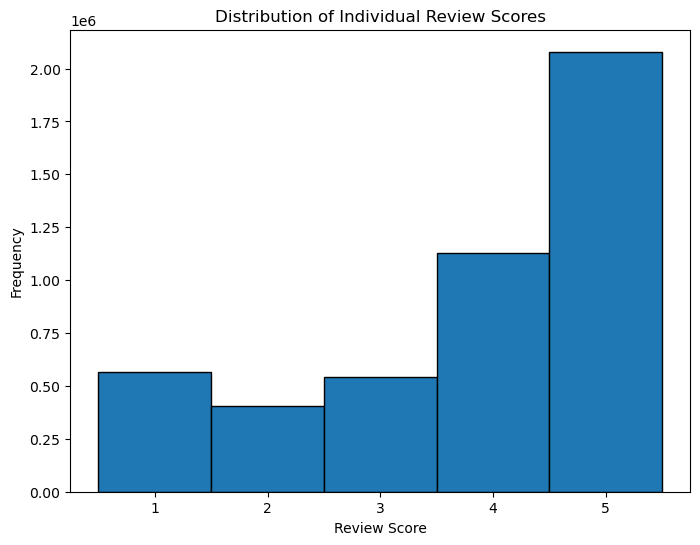

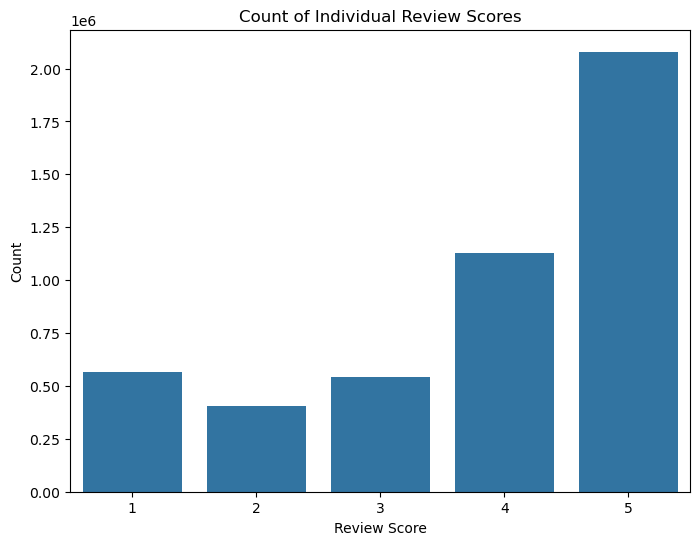

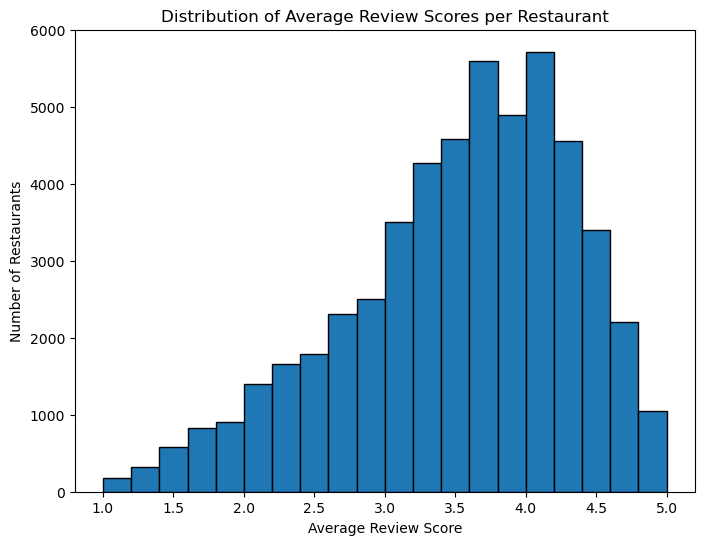

In [32]:
plt.figure(figsize=(8,6))
# Histogram: using bins for scores 1 to 5 (we add an extra bin to include 5)
plt.hist(restaurant_reviews['stars'], bins=range(1, 7), align='left', edgecolor='black')
plt.title("Distribution of Individual Review Scores")
plt.xlabel("Review Score")
plt.ylabel("Frequency")
plt.xticks(range(1, 6))
plt.show()

# Using SNS
plt.figure(figsize=(8,6))
sns.countplot(x='stars', data=restaurant_reviews)
plt.title("Count of Individual Review Scores")
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.show()

# Graph 2: Distribution of Average Review Scores per Restaurant
avg_scores = merged_data['avg_review_score'].dropna()

plt.figure(figsize=(8,6))
plt.hist(avg_scores, bins=20, edgecolor='black')
plt.title("Distribution of Average Review Scores per Restaurant")
plt.xlabel("Average Review Score")
plt.ylabel("Number of Restaurants")
plt.show()